## Import everything that is needed

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
import tensorflow as tf
from tensorflow.python.framework import ops
from Preprocessing import *

/home/nelvin/anaconda3/envs/pp3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load train data set
details of pre-processing under Preprocessing.py

In [2]:
def load_train_dataset():
    X_train = np.empty((1404,64,64,3), dtype="int32")
    Y_train = np.empty((1404,4), dtype="int32")
    
    X_train_id_cards,Y_train_id_cards = load_train_id_cards()
    X_train_slides,Y_train_slides = load_train_slides()
    X_train_paper_docs,Y_train_paper_docs = load_train_paper_documents()
    X_train_receipts,Y_train_receipts = load_train_receipts()
    
    for i in range(482):
        X_train[i] = X_train_id_cards[i]
    for i in range(316):
        X_train[482+i] = X_train_slides[i]
    for i in range(306):
        X_train[798+i] = X_train_paper_docs[i]
    for i in range(300):
        X_train[1104+i] = X_train_receipts[i]
    
    for i in range(482):
        Y_train[i] = Y_train_id_cards[i]
    for i in range(316):
        Y_train[482+i] = Y_train_slides[i]
    for i in range(306):
        Y_train[798+i] = Y_train_paper_docs[i]
    for i in range(300):
        Y_train[1104+i] = Y_train_receipts[i]
        
    return X_train,Y_train

## Load test data set
details of pre-processing under Preprocessing.py

In [3]:
def load_test_dataset():
    X_test = np.empty((65,64,64,3), dtype="int32")
    Y_test = np.empty((65,4), dtype="int32")
    
    X_test_id_cards,Y_test_id_cards = load_test_id_cards()
    X_test_slides,Y_test_slides = load_test_slides()
    X_test_paper_docs,Y_test_paper_docs = load_test_paper_documents()
    X_test_receipts,Y_test_receipts = load_test_receipts()
    
    for i in range(24):
        X_test[i] = X_test_id_cards[i]
    for i in range(10):
        X_test[24+i] = X_test_slides[i]
    for i in range(14):
        X_test[34+i] = X_test_paper_docs[i]
    for i in range(16):
        X_test[48+i] = X_test_receipts[i]
    
    for i in range(24):
        Y_test[i] = Y_test_id_cards[i]
    for i in range(10):
        Y_test[24+i] = Y_test_slides[i]
    for i in range(14):
        Y_test[34+i] = Y_test_paper_docs[i]
    for i in range(16):
        Y_test[48+i] = Y_test_receipts[i]
        
    return X_test,Y_test

In [4]:
'''Extra Tests'''
#X_train_orig,Y_train_orig = load_train_dataset()
#im = Image.fromarray(np.uint8(X_train_orig[99])) # To convert numpy array back into an image
#plt.imshow(im)
#print(X_train_orig[99])

'Extra Tests'

In [5]:
X_train_orig,Y_train_orig = load_train_dataset()
X_test_orig,Y_test_orig = load_test_dataset()
# Normalizing for faster convergence
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = Y_train_orig
Y_test = Y_test_orig
# print(X_train[0])
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1404
number of test examples = 65
X_train shape: (1404, 64, 64, 3)
Y_train shape: (1404, 4)
X_test shape: (65, 64, 64, 3)
Y_test shape: (65, 4)


## Creating placeholders

In [6]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(tf.float32, shape=(None,n_H0,n_W0,n_C0))
    Y = tf.placeholder(tf.float32, shape=(None,n_y))
    ### END CODE HERE ###
    
    return X, Y

In [7]:
# Test
X, Y = create_placeholders(64, 64, 3, 5)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 5), dtype=float32)


## Initialize parameters
1. Weights are initialized using xavier initializer
2. Tensorflow takes care of the bias
3. Weights are for the 2 conv2d functions
4. Tensorflow initializes layers for fully connected part automatically

In [8]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    W1 = tf.get_variable("W1", [4, 4, 3, 8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [2, 2, 8, 16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [9]:
# Test
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))

W1 = [ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 = [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


## Forward propagation
Model: CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED

In [10]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
    drop_out = tf.nn.dropout(P2, 0.7) 
    # FULLY-CONNECTED without non-linear activation function (no softmax).
    # 5 neurons in output layer. 
    Z3 = tf.contrib.layers.fully_connected(P2, 4, activation_fn=None)

    return Z3

In [11]:
# Test
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 4)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,4)})
    print("Z3 = " + str(a))

Z3 = [[-0.4872806   0.7591747  -1.4899058  -2.2552762 ]
 [-0.29407978  0.66546303 -1.4420621  -2.0235498 ]]


## Compute cost
1. **tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y):** computes the softmax entropy loss. This function both computes the softmax activation function as well as the resulting loss. 
2. **tf.reduce_mean:** computes the mean of elements across dimensions of a tensor.

In [12]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (5, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    
    return cost

In [13]:
# Test
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 4)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,4)})
    print("cost = " + str(a))

cost = 0.89869094


## Model
**Steps**:
1. create placeholders
2. initialize parameters
3. forward propagate
4. compute the cost
5. create an optimizer
6. create a session and run a for loop for num_epochs

In [14]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 100, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            # Run the session to execute the optimizer and the cost, the feedict contains X_train & Y_train.
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, temp_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(temp_cost)
        
        #saver = tf.train.Saver()
        #save_path = saver.save(sess, "./Desktop/model.ckpt")
        #print("Model saved in path: %s" % save_path)
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, parameters # does not return test accuracy yet

Cost after epoch 0: 1.399171
Cost after epoch 5: 1.244358
Cost after epoch 10: 1.105728
Cost after epoch 15: 0.916970
Cost after epoch 20: 0.766241
Cost after epoch 25: 0.680607
Cost after epoch 30: 0.612884
Cost after epoch 35: 0.548089
Cost after epoch 40: 0.497268
Cost after epoch 45: 0.471494
Cost after epoch 50: 0.433718
Cost after epoch 55: 0.415652
Cost after epoch 60: 0.400238
Cost after epoch 65: 0.386599
Cost after epoch 70: 0.374242
Cost after epoch 75: 0.361565
Cost after epoch 80: 0.348695
Cost after epoch 85: 0.337189
Cost after epoch 90: 0.325841
Cost after epoch 95: 0.315227


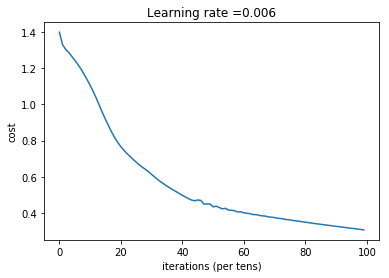

Train Accuracy: 0.8974359
Test Accuracy: 0.8769231


In [17]:
_, parameters = model(X_train, Y_train, X_test, Y_test, learning_rate = 0.006, num_epochs = 100)